In [1]:
#Importing standard libraries to aid in performing the data analysis

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime

# Question 1

1. Programmatically download and load into your favorite analytical tool the trip data for September 2015.

2. Report how many rows and columns of data you have loaded.

In [2]:
#Code to load the data into the iPython Notebook

trip_df= pd.read_csv('green_tripdata_2015-09.csv')
trip_df.head()


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [3]:
#Shows the columns in the dataset
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1494926 non-null float64
To

In [4]:
#Displays the total number of rows and columns in the dataset

trip_df.shape

(1494926, 21)

# Question 2

1. Plot a histogram of the number of the trip distance ("Trip Distance").

2. Report any structure you find and any hypotheses you have about that structure.

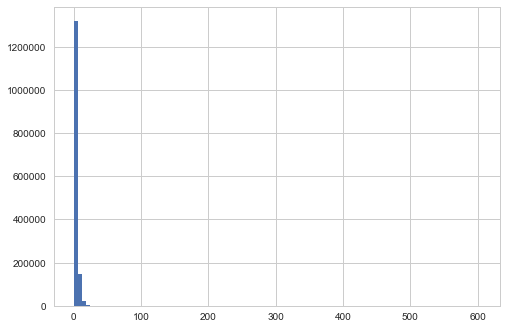

In [5]:
trip_df['Trip_distance'].hist(bins=100)

In [6]:
trip_df['Trip_distance'].value_counts()

0.00     20592
1.00     16735
0.90     16699
0.80     16152
1.10     16070
1.20     15212
1.30     14731
0.70     14365
1.40     13789
1.50     12898
0.60     12552
1.60     11893
1.70     11077
1.80     10311
0.50      9864
1.90      9734
2.00      9190
2.10      8528
2.20      8363
2.30      7788
2.40      7384
2.50      7154
2.60      6715
2.80      6452
0.40      6439
2.70      6371
2.90      6018
3.00      5797
3.10      5550
3.20      5330
         ...  
61.21        1
30.68        1
45.50        1
29.27        1
30.27        1
26.84        1
29.86        1
45.19        1
50.43        1
45.94        1
44.06        1
40.94        1
27.42        1
23.89        1
31.36        1
23.61        1
40.87        1
31.60        1
40.06        1
25.34        1
40.31        1
35.76        1
32.24        1
30.02        1
55.16        1
23.64        1
23.86        1
25.59        1
40.19        1
31.64        1
Name: Trip_distance, Length: 3210, dtype: int64

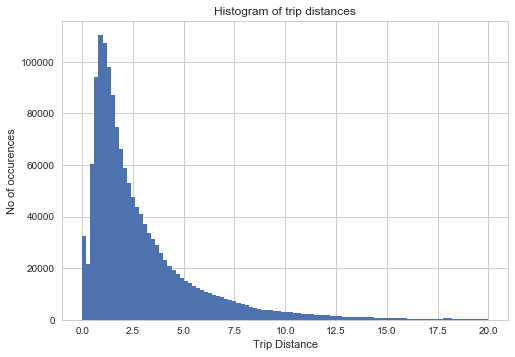

In [7]:
plt.hist(trip_df['Trip_distance'][trip_df['Trip_distance']<20],bins = 100)
plt.title('Histogram of trip distances')
plt.xlabel('Trip Distance')
plt.ylabel('No of occurences')

## This above Histogram shows us that the occurences were higher for short trip distances and the occurences reduced as the distance increased. The trips are not random. If they were random, we would have a symmetric Gaussian distribution.

# Question 3
1. Report mean and median trip distance grouped by hour of day.

2. We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

In [8]:
trip_df['lpep_pickup_datetime'].head()

0    2015-09-01 00:02:34
1    2015-09-01 00:04:20
2    2015-09-01 00:01:50
3    2015-09-01 00:02:36
4    2015-09-01 00:00:14
Name: lpep_pickup_datetime, dtype: object

In [9]:

trip_df['pickup'] = trip_df['lpep_pickup_datetime'].apply(lambda x: 
                                                       datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [10]:
#collecting hourly statistics in order to give the mean and median by the hour of the day
trip_df['pickup_hour'] = trip_df['pickup'].apply(lambda x: x.hour)

In [11]:
trip_df['dropoff'] = trip_df['Lpep_dropoff_datetime'].apply(lambda x: 
                                                       datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
trip_df['dropoff_hour'] = trip_df['dropoff'].apply(lambda x: x.hour)

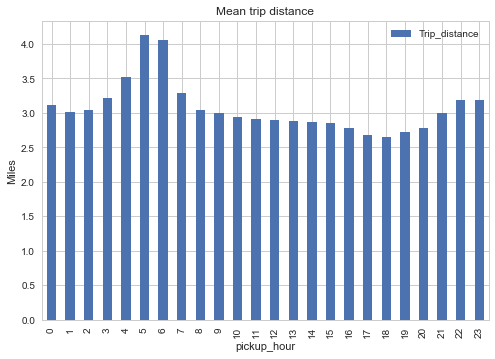

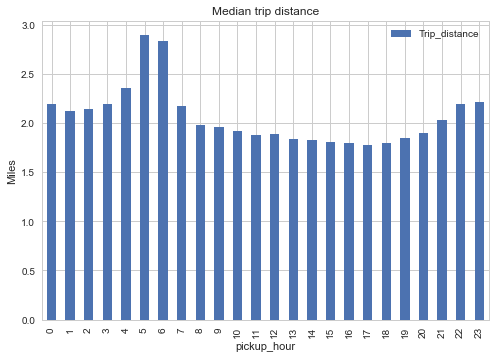

In [12]:
#Plotting the mean and median trip distance grouped by the hour of the day

trip_df[['Trip_distance','pickup_hour']].groupby('pickup_hour').mean().plot.bar()
plt.title('Mean trip distance')
plt.ylabel('Miles')
plt.show()

trip_df[['Trip_distance','pickup_hour']].groupby('pickup_hour').median().plot.bar()
plt.title('Median trip distance')
plt.ylabel('Miles')
plt.show()

Looking at the dataset we know that JFK and Newark are the two airports in the NYC area having RateCode IDs 2 and 3. So, we use them for our analysis.

In [13]:
#Average trips to/from NYC area airports
#Creating airport_trips to help in our analysis

airports_trips = trip_df[(trip_df.RateCodeID==2) | (trip_df.RateCodeID==3)]

print("Number of trips to/from NYC airports: ", airports_trips.shape[0])
print("Average fare of trips to/from NYC airports: $", airports_trips.Fare_amount.mean(),"per trip")
print("Average total charged amount of trips to/from NYC airports: $", airports_trips.Total_amount.mean(),"per trip")


Number of trips to/from NYC airports:  5552
Average fare of trips to/from NYC airports: $ 48.976945244956774 per trip
Average total charged amount of trips to/from NYC airports: $ 57.20842038904719 per trip


# Question 5
Choose only one of these options to answer for Question 5. There is no preference as to which one you choose. Please select the question that you feel best suits your particular skills and/or expertise. If you answer more than one, only the first will be scored.
Option A: Distributions
o    Build a derived variable representing the average speed over the course of a trip.

o    Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?

o    Can you build up a hypothesis of average trip speed as a function of time of day?



In [14]:
#import statistics libraries for visualization

import scipy.stats as stats
import statistics

In [15]:
ans_t = (trip_df['dropoff'] - trip_df['pickup']).apply(lambda x: x.total_seconds())


In [16]:
#Omitting entries with less than a minute travel time

print('Percentage of entries with travel time less than a minute: ',100 * trip_df[ans_t < 60].shape[0]/trip_df.shape[0],'%')

Percentage of entries with travel time less than a minute:  1.7081781974492383 %


In [17]:
#Code for Finding the average speed
trip_df['travel_time'] = (trip_df['dropoff'] - trip_df['pickup']).apply(lambda x: x.total_seconds()) 
trip_df = trip_df[trip_df['travel_time'] > 60]
trip_df['average_speed'] = 3600*(trip_df['Trip_distance']/trip_df['travel_time'])

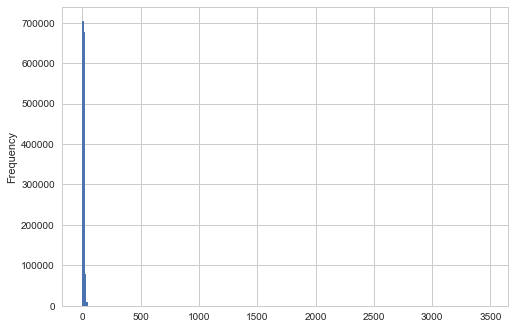

In [18]:
trip_df['average_speed'].plot.hist(bins=300)


We remove the entries with over 100 miles per hour of average speed as it is unreasonable and a result of erroneous data.

In [19]:
print('No of entries with average speed over 100 miles per hour: ',(trip_df['average_speed']>200).value_counts()[1])
trip_df = trip_df[trip_df['average_speed']<200]

No of entries with average speed over 100 miles per hour:  105


In [20]:
trip_df['week'] = trip_df['dropoff'].apply(lambda x: x.week)


In [21]:
week_1 = trip_df['average_speed'][trip_df['week']==36].as_matrix()
week_2 = trip_df['average_speed'][trip_df['week']==37].as_matrix()
week_3 = trip_df['average_speed'][trip_df['week']==38].as_matrix()
week_4 = trip_df['average_speed'][trip_df['week']==39].as_matrix()
week_5 = trip_df['average_speed'][trip_df['week']==40].as_matrix()


In [22]:
stats.f_oneway(week_1,week_2, week_3,week_4, week_5)


F_onewayResult(statistic=1020.0249648527437, pvalue=0.0)

## The test indicates a large f-value and a small p-value, therefore we reject the null hypothesis and we conclude that the differences between the groups are statistically significant which implies that the week of the month does seem to be related to the average speed. 

In [23]:
print(week_1.mean(),week_2.mean(),week_3.mean(),week_4.mean(),week_5.mean())


13.3794322197 12.7228267331 12.7112137556 13.1891258526 12.4681156963


In [24]:
print(statistics.median(week_1),statistics.median(week_2),statistics.median(week_3),statistics.median(week_4),
      statistics.median(week_5))


12.1282487929 11.6170212766 11.6387959866 12.0286396181 11.421686747


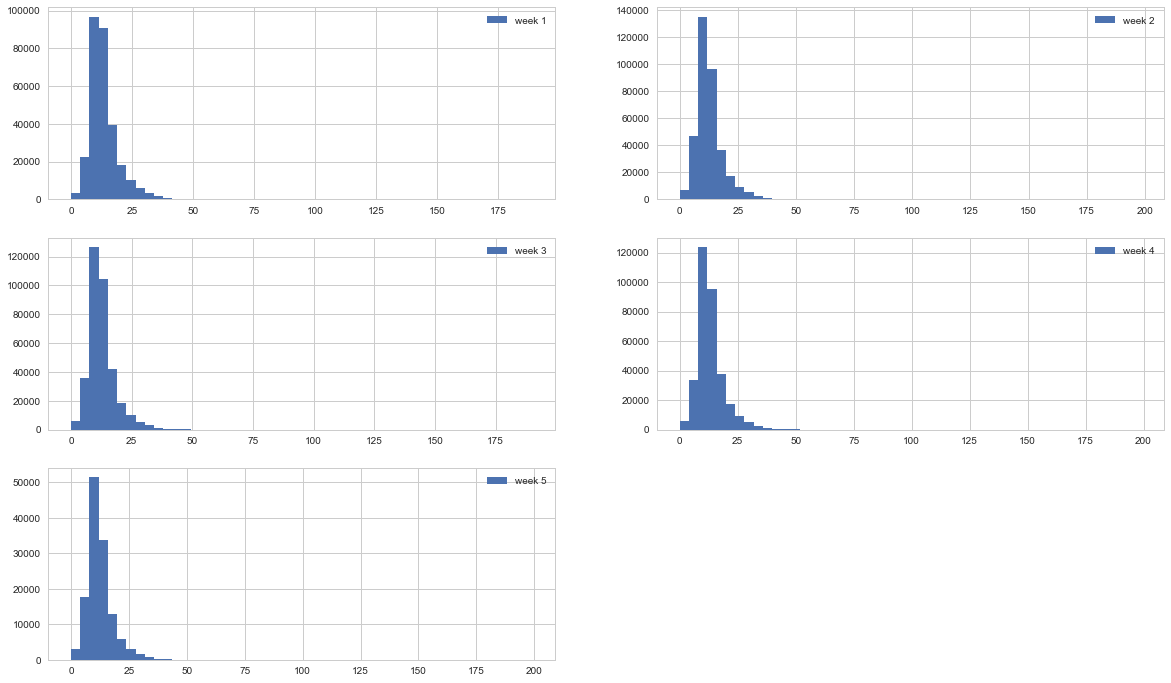

In [25]:
#WeeklyStatistics 
plt.rcParams["figure.figsize"] = [20,12]
plt.subplot(3,2,1)
plt.hist(week_1,bins = 50,label = 'week 1')
plt.legend()
plt.subplot(3,2,2)
plt.hist(week_2,bins = 50,label = 'week 2')
plt.legend()
plt.subplot(3,2,3)
plt.hist(week_3,bins = 50,label = 'week 3')
plt.legend()
plt.subplot(3,2,4)
plt.hist(week_4,bins = 50,label = 'week 4')
plt.legend()
plt.subplot(3,2,5)
plt.hist(week_5,bins = 50,label = 'week 5')
plt.legend()
plt.legend()
plt.savefig('task5')
plt.show()

In [26]:
grouped = trip_df.groupby('pickup_hour')
samples = []

for name,group in grouped:
    samples.append(group['average_speed'])

In [27]:
sample = samples
stats.f_oneway(sample[0],sample[1],sample[2],sample[3], sample[4],sample[5],sample[6],sample[7],sample[8],sample[9],
              sample[10],sample[11],sample[12],sample[13],sample[14],sample[15],sample[16],sample[17],sample[18],
               sample[19],
              sample[20],sample[21],sample[22],sample[23])

F_onewayResult(statistic=4901.4181256899383, pvalue=0.0)


## The test for sets partitioned as per the hour of the journey also gives a high f-value and p-value of 0, implying that there are statistifically significant differences in the data sets considered.

In [28]:
#Computing Mean and Median Speeds every hour
means = []
medians = []
for hour in range(24):
    means.append(statistics.mean(sample[hour]))
    print('Mean:',statistics.mean(sample[hour]))
    medians.append(statistics.median(sample[hour]))
    print('Median:',statistics.median(sample[hour]))

Mean: 14.6648320896
Median: 13.4181818182
Mean: 14.9192467836
Median: 13.728
Mean: 15.1347423976
Median: 13.9655172414
Mean: 15.537595892
Median: 14.2243902439
Mean: 16.3669991056
Median: 14.6597994169
Mean: 18.1499520716
Median: 16.1937716263
Mean: 17.1669571131
Median: 15.3365853659
Mean: 13.5392247861
Median: 12.0550458716
Mean: 12.3026723927
Median: 11.0204081633
Mean: 12.5906252221
Median: 11.3286713287
Mean: 12.5867679821
Median: 11.3606557377
Mean: 12.2963558936
Median: 11.1070496084
Mean: 12.1980039045
Median: 11.0278481013
Mean: 12.099259879
Median: 10.9638932496
Mean: 11.6001803151
Median: 10.5804066543
Mean: 11.221740808
Median: 10.3111409501
Mean: 10.9908049825
Median: 10.1714862332
Mean: 10.9586288012
Median: 10.2252810984
Mean: 11.5489768166
Median: 10.7547169811
Mean: 12.1046793002
Median: 11.232449298
Mean: 12.7934866352
Median: 11.8224852071
Mean: 13.6629796797
Median: 12.4897959184
Mean: 14.1359640648
Median: 12.9327014218
Mean: 14.4152452258
Median: 13.2050209205


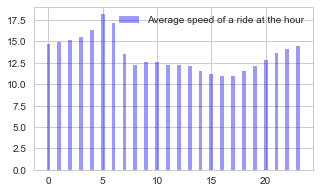

In [29]:
#Plotting Mean Speed at the hour
plt.rcParams["figure.figsize"] = [5,3]
index = np.arange(24)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Average speed of a ride at the hour')
plt.legend()
plt.savefig('task_5_b_1')

plt.show()

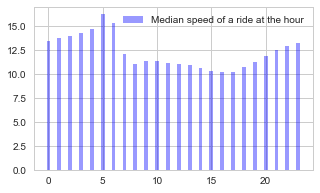

In [30]:
#Plotting Median Speed at the hour

plt.rcParams["figure.figsize"] = [5,3]
index = np.arange(24)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, medians, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Median speed of a ride at the hour')
plt.legend()
plt.savefig('task_5_b_2')

plt.show()

# Question 4
1. Build a derived variable for tip as a percentage of the total fare.

2. Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

In [31]:
trip_df['tip_percent'] = trip_df['Tip_amount']/trip_df['Fare_amount']
trip_df['tip_percent'].head()


2    0.125000
3    0.000000
4    0.000000
5    0.247273
6    0.000000
Name: tip_percent, dtype: float64

In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [33]:
#Cleaning the data

def clean_dataset(trip_df):
    assert isinstance(trip_df, pd.DataFrame), "trip_df needs to be a pd.DataFrame"
    trip_df.dropna(inplace=True)
    indices_to_keep = ~trip_df.isin([np.nan, np.inf, -np.inf]).any(1)
    return trip_df[indices_to_keep].astype(np.float64)

In [34]:
trip_df.dropna(subset = ['Trip_type '],inplace = True)


To deal with categorical values we would need to use the one-hot encoding process from the sklearn library which works only on numpy arrays, hence we convert the relevant columns to numpy arrays in further analysis and are encoded to one-hot vectors.


In [35]:
#One-Hot encoding 
X_pre_encode = trip_df['VendorID'].as_matrix()
le = preprocessing.LabelEncoder()
le.fit(X_pre_encode.reshape(X_pre_encode.shape[0],1))
ans = le.transform(X_pre_encode)

enc = OneHotEncoder()
enc.fit(ans.reshape(X_pre_encode.shape[0],1))
ans1 = enc.transform(ans.reshape(X_pre_encode.shape[0],1)).toarray()

X_pre_encode = trip_df['Store_and_fwd_flag'].as_matrix()
le = preprocessing.LabelEncoder()
le.fit(X_pre_encode.reshape(X_pre_encode.shape[0],1))
ans = le.transform(X_pre_encode)

enc = OneHotEncoder()
enc.fit(ans.reshape(X_pre_encode.shape[0],1))
ans2 = enc.transform(ans.reshape(X_pre_encode.shape[0],1)).toarray()

X = np.c_[ans1,ans2]
print(X.shape)

C:\Users\Neelesh Jayaraman\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1469280, 4)


In [36]:
X = np.c_[X , trip_df['Passenger_count'].as_matrix(),trip_df['Trip_distance'].as_matrix(),trip_df['Fare_amount'].as_matrix(),
         trip_df['Extra'].as_matrix(),trip_df['MTA_tax'].as_matrix(),trip_df['Tolls_amount'].as_matrix(),
         trip_df['improvement_surcharge'].as_matrix()]

In [37]:
print(X.shape)


(1469280, 11)


In [38]:

for col in ['Payment_type','Trip_type ','pickup_hour','dropoff_hour']:

    X_pre_encode = trip_df[col].as_matrix()
    le = preprocessing.LabelEncoder()
    le.fit(X_pre_encode.reshape(X_pre_encode.shape[0],1))
    ans = le.transform(X_pre_encode)

    enc = OneHotEncoder()
    enc.fit(ans.reshape(X_pre_encode.shape[0],1))
    ans2 = enc.transform(ans.reshape(X_pre_encode.shape[0],1)).toarray()
    X = np.c_[X,ans2]

C:\Users\Neelesh Jayaraman\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We choose 13 columns as features for regression.

In [39]:
X.shape


(1469280, 66)

In [40]:
y = trip_df['tip_percent'].as_matrix()


In [41]:
np.isnan(X).any(), np.isnan(y).any()


(False, True)

In [42]:
from sklearn.preprocessing import Imputer
imputer= Imputer(missing_values='NaN', strategy= 'mean', axis =1) 
imputer.fit(y)

Imputer(axis=1, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [43]:
np.isnan(X).any(), np.isnan(y).any()


(False, True)

In [44]:
import sklearn
from sklearn.linear_model import LinearRegression

In [45]:
#Building the Linear Regression Model

lreg= LinearRegression()

In [ ]:
# Train the model using the training sets and performing regression
lreg.fit(X, y)
# The coefficients
print('Coefficients: \n', lreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((lreg.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lreg.score(X, y))

Coefficients: [ -1.61022847e+05 -1.61022850e+05 1.51733544e+09 1.51733544e+09 5.90246850e-04 -4.53124937e-04 -6.29359269e-04 4.91166058e-03 1.48016374e-02 4.90760803e-03 -2.00187247e-02 2.06673551e+07 2.06673549e+07 2.06673549e+07 2.06673549e+07 2.06673549e+07 2.53230295e+07 2.53230294e+07 -1.10652128e+06 -1.10652128e+06 -1.10652128e+06 -1.10652128e+06 -1.10652129e+06 -1.10652129e+06 -1.10652129e+06 -1.10652130e+06 -1.10652130e+06 -1.10652130e+06 -1.10652130e+06 -1.10652130e+06 -1.10652130e+06 -1.10652130e+06 -1.10652130e+06 -1.10652130e+06 -1.10652130e+06 -1.10652130e+06 -1.10652129e+06 -1.10652129e+06 -1.10652129e+06 -1.10652129e+06 -1.10652128e+06 -1.10652128e+06 8.33896716e+06 8.33896717e+06 8.33896717e+06 8.33896717e+06 8.33896717e+06 8.33896717e+06 8.33896717e+06 8.33896718e+06 8.33896718e+06 8.33896718e+06 8.33896718e+06 8.33896718e+06 8.33896718e+06 8.33896718e+06 8.33896718e+06 8.33896718e+06 8.33896718e+06 8.33896718e+06 8.33896718e+06 8.33896718e+06 8.33896718e+06 8.33896717e+06 8.33896717e+06 8.33896717e+06 -1.48662881e+07 -1.48662881e+07 -1.48662881e+07] 
Mean squared error: 0.01 
Variance score: 0.64

In [ ]:
np.abs(lreg.coef_)

array([ 1.61022847e+05, 1.61022850e+05, 1.51733544e+09, 1.51733544e+09, 5.90246850e-04, 4.53124937e-04, 6.29359269e-04, 4.91166058e-03, 1.48016374e-02, 4.90760803e-03, 2.00187247e-02, 2.06673551e+07, 2.06673549e+07, 2.06673549e+07, 2.06673549e+07, 2.06673549e+07, 2.53230295e+07, 2.53230294e+07, 1.10652128e+06, 1.10652128e+06, 1.10652128e+06, 1.10652128e+06, 1.10652129e+06, 1.10652129e+06, 1.10652129e+06, 1.10652130e+06, 1.10652130e+06, 1.10652130e+06, 1.10652130e+06, 1.10652130e+06, 1.10652130e+06, 1.10652130e+06, 1.10652130e+06, 1.10652130e+06, 1.10652130e+06, 1.10652130e+06, 1.10652129e+06, 1.10652129e+06, 1.10652129e+06, 1.10652129e+06, 1.10652128e+06, 1.10652128e+06, 8.33896716e+06, 8.33896717e+06, 8.33896717e+06, 8.33896717e+06, 8.33896717e+06, 8.33896717e+06, 8.33896717e+06, 8.33896718e+06, 8.33896718e+06, 8.33896718e+06, 8.33896718e+06, 8.33896718e+06, 8.33896718e+06, 8.33896718e+06, 8.33896718e+06, 8.33896718e+06, 8.33896718e+06, 8.33896718e+06, 8.33896718e+06, 8.33896718e+06, 8.33896718e+06, 8.33896717e+06, 8.33896717e+06, 8.33896717e+06, 1.48662881e+07, 1.48662881e+07, 1.48662881e+07])